In [1]:
pip install -q langchain-google-genai

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade -q langchain-google-genai

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip show langchain-google-genai

Name: langchain-google-genai
Version: 1.0.10
Summary: An integration package connecting Google's genai package and LangChain
Home-page: https://github.com/langchain-ai/langchain-google
Author: 
Author-email: 
License: MIT
Location: c:\miniconda\Gen_AI_Automation_Deep_Learning\LangChain_Mastery_Develop_LLM_Apps_with_LangChain_&_Pinecone\venv\Lib\site-packages
Requires: google-generativeai, langchain-core
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install -q google-generativeai

Note: you may need to restart the kernel to use updated packages.


In [5]:
# loading the API key form .env
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

In [40]:
# prompting the user for the API key if it wasn't loaded from .env
import getpass
import os
if 'GOOGLE_API_KEY' not in os.environ:
    os.environ['GOOGLE_API_KEY'] = getpass.getpass('Provide your Google API Key: ')

In [41]:
# listing all available models
import google.generativeai as genai
for model in genai.list_models():
    print(model.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-8b-exp-0827
models/embedding-001
models/text-embedding-004
models/aqa


In [8]:
pip install -q Iprogress

Note: you may need to restart the kernel to use updated packages.


## Integrating Gemini With LangChain

In [9]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model = "gemini-pro", temperature = 0.9)
response = llm.invoke("Write a paragraph about life on Mars in the year 2200")
print(response.content)

In the Martian metropolis of Elysium City, the year 2200 dawned with vibrant life. Under the vast expanse of terraformed skies, sleek flying cars soared through the air, transporting inhabitants to towering skyscrapers. Verdant parks dotted the cityscape, their lush greenery providing respite from the ethereal Martian landscape. Homes were equipped with advanced technologies, including holographic projections and self-cleaning systems. Settlers, hailing from diverse earthly origins, lived harmoniously, forming a vibrant tapestry of cultures. Scientific advancements had led to breakthroughs in oxygen production and water purification, sustaining a growing population. Terraformed regions flourished with lush vegetation and bountiful harvests, ensuring food security. Life on Mars in 2200 was a testament to human ingenuity and the relentless pursuit of a cosmic destiny.


In [10]:
# Import the necessary class for interacting with Google's generative AI models
from langchain_google_genai import ChatGoogleGenerativeAI

# Create an instance of the LLM, using the 'gemini-pro' model and set creativity level
llm = ChatGoogleGenerativeAI(model='gemini-pro', temperature=0.9)  

# Send a prompt to the LLM, requesting a creative paragraph
response = llm.invoke('Write a paragraph about life on Mars in year 2100.') 

# Print the generated text from the LLM's response
print(response.content)  

In the year 2100, the once-barren planet of Mars has blossomed into a thriving human colony. The domed cities of Elysium, Utopia, and Isidis Planitia are home to a multi-cultural society of scientists, engineers, explorers, and settlers. Inside these pressurized domes, life hums with activity. Advanced hydroponic farms provide sustenance, while solar and nuclear power plants generate energy. Martian pioneers don airtight suits to venture outside, traversing the dusty landscapes in rovers, studying the planet's geological wonders, and searching for signs of past life. With its thin atmosphere and harsh radiation, life on Mars remains a challenge, but the human spirit has prevailed, transforming this desolate world into a testament to hope, ingenuity, and the indomitable drive to explore the unknown.


In [13]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
llm = ChatGoogleGenerativeAI(model='gemini-pro')

prompt = PromptTemplate.from_template('You are a content creator. Write me a tweet about {topic}')

# Create a chain that will use the LLM and prompt 
chain = LLMChain(
    llm=llm,
    prompt=prompt,
    verbose=True
)

topic = 'Why will AI change the world'

# Execute the chain, providing the topic as input
response = chain.invoke(input=topic)
print(response["text"])



> Entering new LLMChain chain...
Prompt after formatting:
You are a content creator. Write me a tweet about Why will AI change the world

> Finished chain.
🤖 AI Revolution: Brace for transformative power! AI will revolutionize industries, enhance decision-making, personalize experiences, automate tasks, and create new job opportunities. Get ready for a future where AI empowers humanity to reach unprecedented heights! #ArtificialIntelligence #FutureTech


In [14]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
llm = ChatGoogleGenerativeAI(model='gemini-pro')

prompt = PromptTemplate.from_template('You are a content creator. Write me a tweet about {topic}')

# Create a chain that will use the LLM and prompt 
chain = LLMChain(
    llm=llm,
    prompt=prompt,
    verbose=True
)

topic = 'Ganesh Chaturthi in my country Yard'

# Execute the chain, providing the topic as input
response = chain.invoke(input=topic)
print(response["text"])



> Entering new LLMChain chain...
Prompt after formatting:
You are a content creator. Write me a tweet about Ganesh Chaturthi in my country Yard

> Finished chain.
#GaneshChaturthi Mubarak! 🌺🌷

May Lord Ganesha bless us all with wisdom, prosperity, and happiness on this auspicious day. Celebrate the arrival of Vighnaharta in our homes and hearts, bringing joy and love to our lives. #Ganeshotsav #GanpatiBappaMorya #Yard


## System Prompt and Streaming

In [15]:
from langchain_core.messages import HumanMessage, SystemMessage
llm = ChatGoogleGenerativeAI(model='gemini-pro', convert_system_message_to_human=True)
output = llm.invoke(
    [
        SystemMessage(content='Answer only YES or NO in French.'),
        HumanMessage(content='Is fish a mammal?')
    ]
)
output.content

c:\miniconda\Gen_AI_Automation_Deep_Learning\LangChain_Mastery_Develop_LLM_Apps_with_LangChain_&_Pinecone\venv\Lib\site-packages\langchain_google_genai\chat_models.py:381: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


'NON'

In [16]:
llm = ChatGoogleGenerativeAI(model='gemini-pro', temperature=0)
prompt = 'Write a scientific paper outlining the mathematical foundation of our universe.'
response = llm.invoke(prompt)
print(response.content)

**Title:** The Mathematical Foundation of Our Universe

**Abstract:**

The universe we inhabit is governed by a set of fundamental mathematical principles that underpin its structure, dynamics, and evolution. This paper explores the mathematical foundation of our universe, examining the key mathematical concepts and theories that provide a framework for understanding the cosmos. We discuss the role of geometry, topology, algebra, and calculus in describing the universe's properties and behavior.

**Introduction:**

The pursuit of understanding the universe has been a central endeavor of human inquiry for centuries. From the ancient Greeks to modern-day physicists, scientists have sought to unravel the mysteries of the cosmos through observation, experimentation, and mathematical modeling. Mathematics has emerged as an indispensable tool in this quest, providing a language for describing the universe's fundamental laws and predicting its behavior.

**Geometry and Topology:**

Geometry a

In [20]:
# enabling streaming
for chunk in llm.stream(prompt):
    print(chunk.content)
    print('-' * 400)
  

**Title:** The Mathematical Foundation of Our Universe

**Abstract:**

The universe
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 we inhabit is governed by a set of fundamental mathematical principles that underpin its structure, dynamics, and evolution. This paper explores the mathematical foundation of our universe, examining
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Multimodal AI with Gemini Pro Vision

In [21]:
pip install -q pillow # FREE Python Imaging Library

Note: you may need to restart the kernel to use updated packages.


In [33]:
import requests
from PIL import Image
from io import BytesIO

# Download the image from the URL
url = 'https://i.ibb.co/gJXtcbj/match.jpg'
response = requests.get(url)

# Open the image using PIL after loading it into a BytesIO object
img = Image.open(BytesIO(response.content))

# Show the image (optional)
img.show()

In [34]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True) 

# Create LLM instance, using a model specialized for images
llm = ChatGoogleGenerativeAI(model='gemini-1.5-flash-001')  

# The question to ask about the image
prompt = 'What is in this image?' 

# Create a structured message combining text and image reference
message = HumanMessage(
  content=[
    {'type': 'text', 'text': prompt},  # Include the textual prompt
    {'type': 'image_url', 'image_url': url}  # Include a reference to the image (img variable holds the URL)
  ]
)  

# Send the message to the LLM for analysis
response = llm.invoke([message]) 
# Print the LLM's description of the image 
print(response.content)  

The image shows a football field with players on the field. There are bleachers in the background, and a blue water bottle on the field.  The image was taken from the bleachers, looking down at the field. The sky is cloudy.


In [42]:
def ask_gemini(text, image, model='gemini-1.5-flash-latest'):
    llm = ChatGoogleGenerativeAI(model=model)
    message = HumanMessage(
        content=[
            {'type': 'text', 'text': text},
            {'type': 'image_url', 'image_url': image}
        ]
    )
    response = llm.invoke([message])
    return response

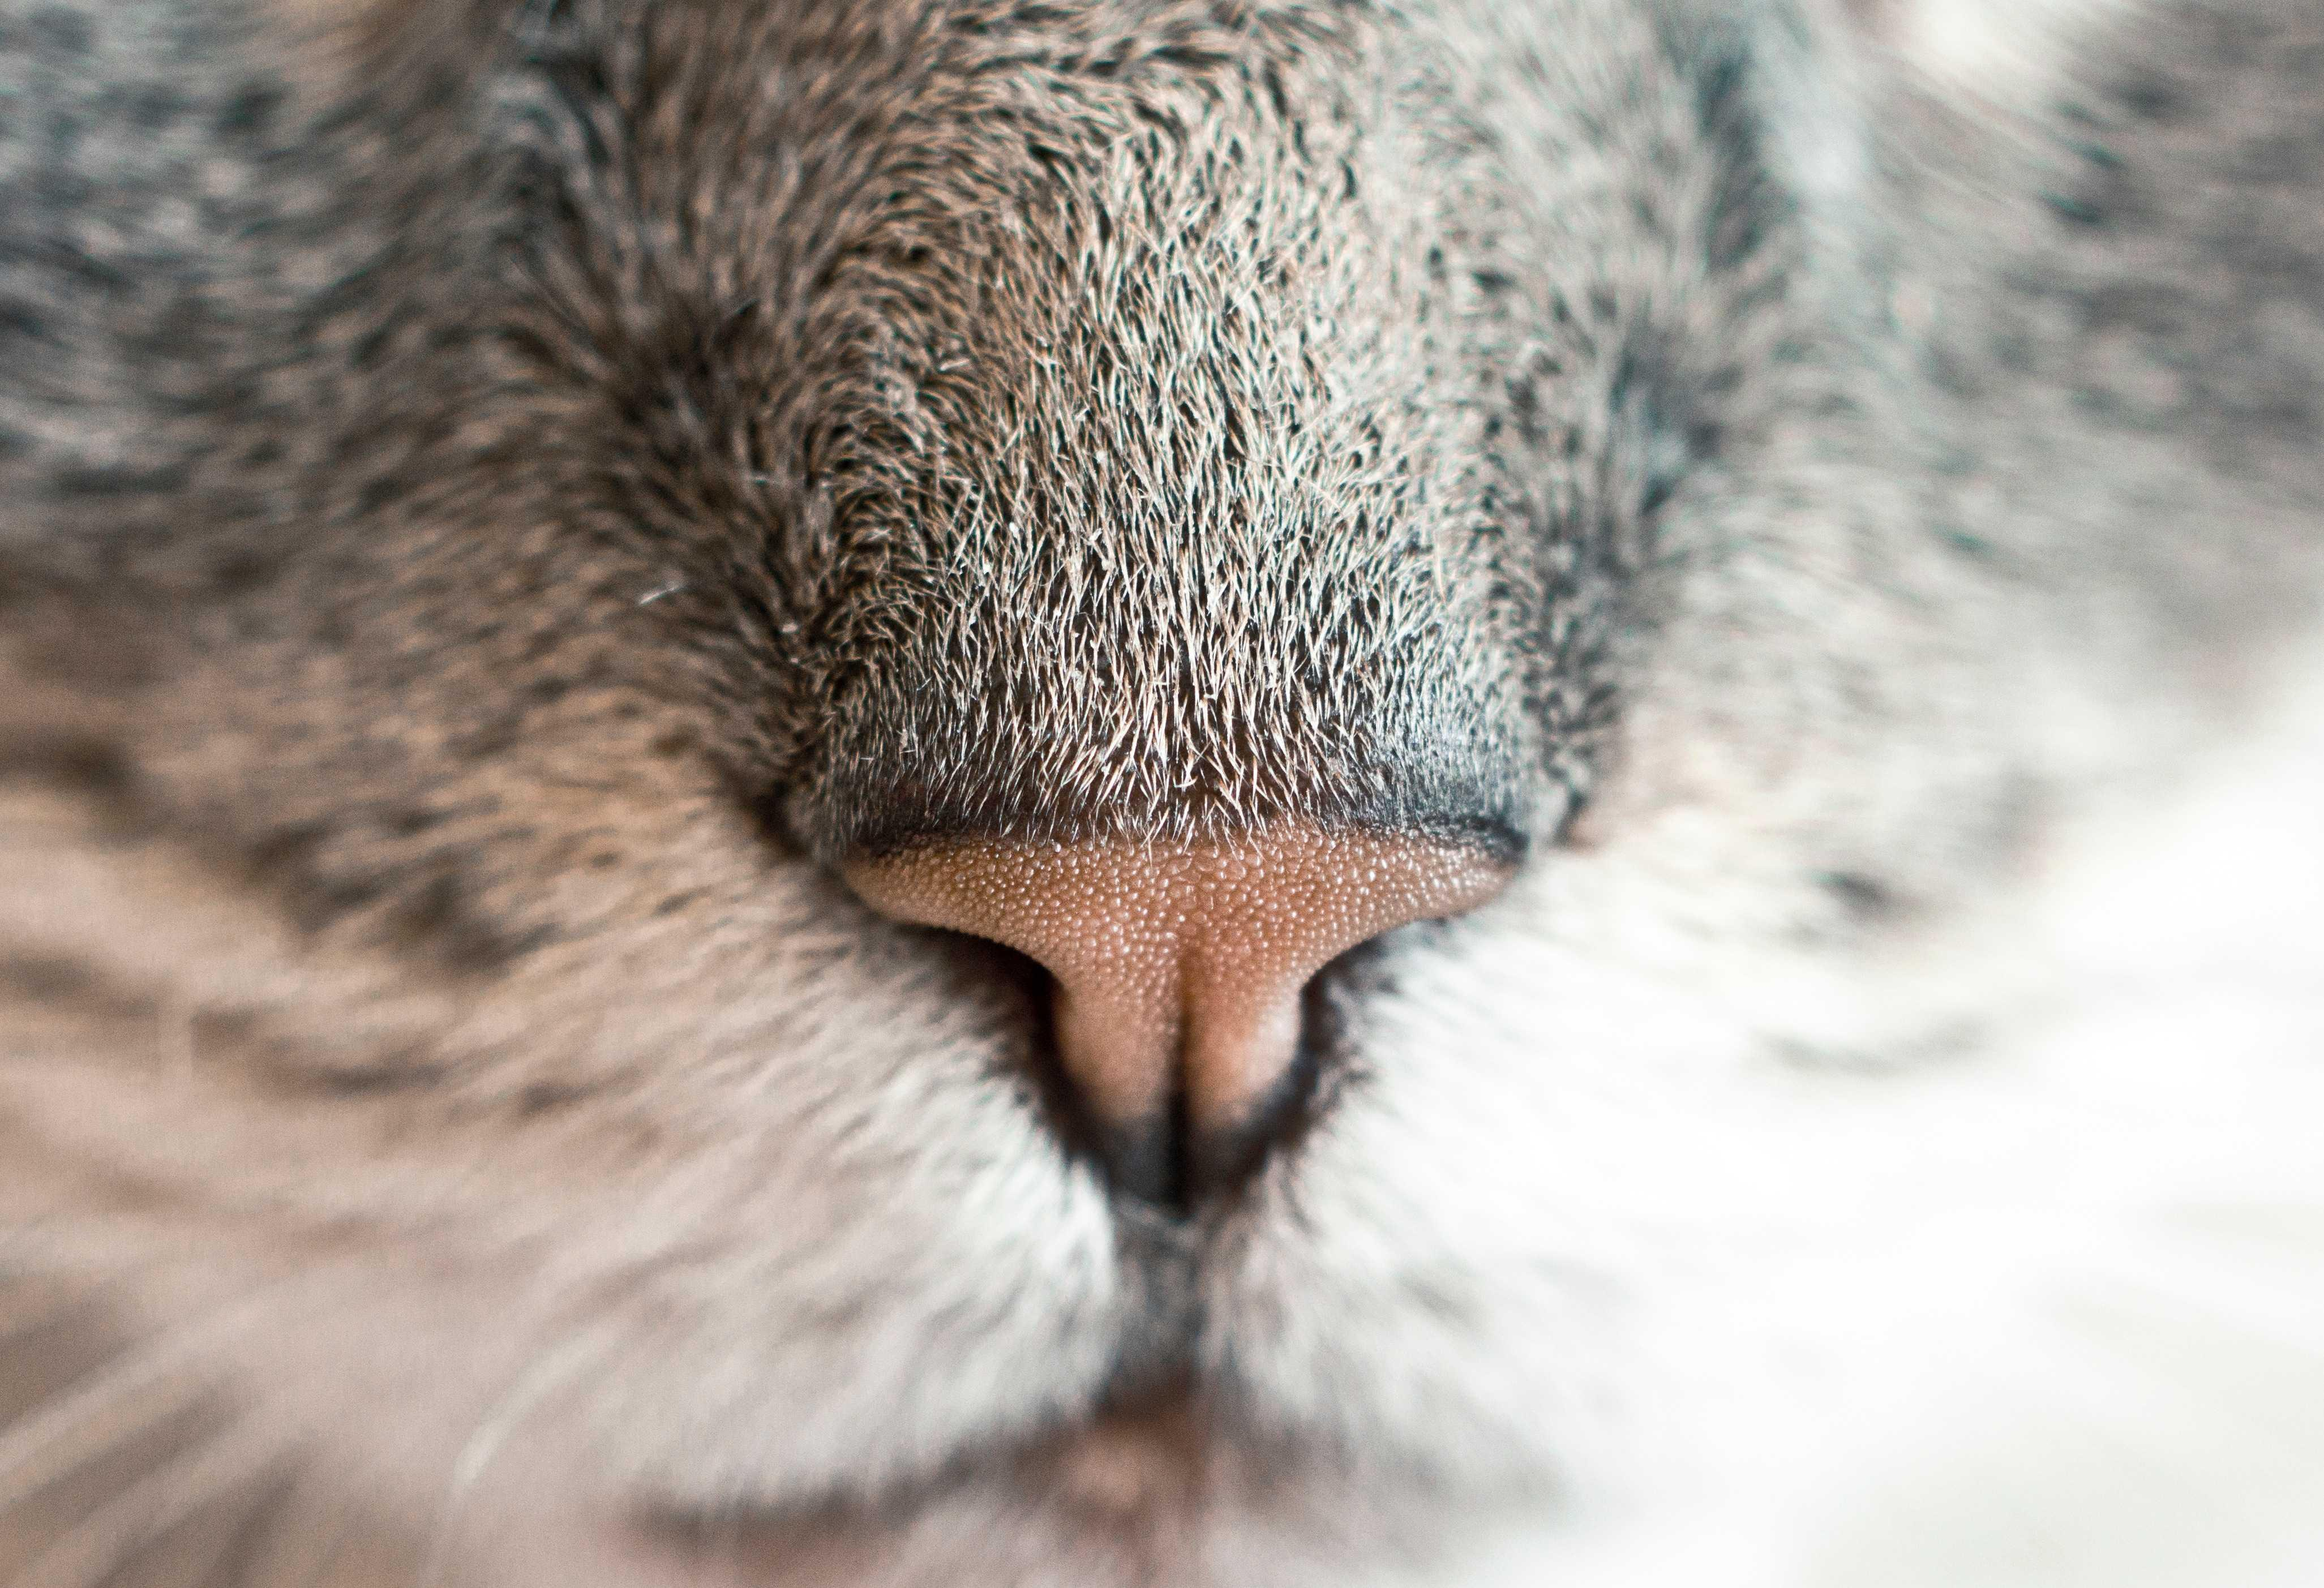

In [43]:
import requests
from IPython.display import Image
image_url = 'https://picsum.photos/id/40/4106/2806'
content = requests.get(image_url).content
image_data = Image(content)
image_data

In [44]:
response = ask_gemini('Describe this image as detailed as possible', image_url)
print(response)

Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised InternalServerError: 500 An internal error has occurred. Please retry or report in https://developers.generativeai.google/guide/troubleshooting.


InternalServerError: 500 An internal error has occurred. Please retry or report in https://developers.generativeai.google/guide/troubleshooting